### Create new

In [1]:

from xen.training.SequenceVAETrainer import SequenceVAETrainer
from xen.data.PercussionMap import PercussionMap

paths = ["../../../ai/trainingdata/music/800000_Drum_Percussion_MIDI_Archive/Rock-Indie"]

trainer = SequenceVAETrainer(modelPath="../models", modelName="perc-rock")
trainer.loadSongDataset(paths, timesig='4/4', ticksPerQuarter=4, quartersPerMeasure=4, measuresPerSequence=1, percussionMap=PercussionMap())
trainer.createModel(latentDim = 3, hiddenLayers = 2)


2023-07-22 15:41:42.694811: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading 27 files


IntProgress(value=0, max=27)

Label(value='')

Loaded 27 songs
Filtered to 27 songs
Encoded 27 sequences
Sparse sequences shape: (27, 16, 128)
Lowest note: 1, Highest note: 5
Trimmed sequences shape: (27, 16, 5)
Flattened sequences shape: (27, 80)
Layer dims: [80, 27, 9, 3]
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 80)]         0           []                               
                                                                                                  
 encoder_internal_0 (Dense)     (None, 27)           2187        ['encoder_input[0][0]']          
                                                                                                  
 encoder_internal_1 (Dense)     (None, 9)            252         ['encoder_internal_0[0][0]']     
                                                              

### Load Existing

In [ ]:

from xen.training.SequenceVAETrainer import SequenceVAETrainer

trainer = SequenceVAETrainer(modelPath="../models", modelName="mutopia_guitar_4-4")
trainer.loadSongDataset(["../../../ai/trainingdata/music/mutopia_guitar/"], timesig='4/4', ticksPerQuarter=4, quartersPerMeasure=4, measuresPerSequence=1)
trainer.loadModel()


### Train

In [16]:
trainer.train(batchSize = 32, epochs = 500, learning_rate = 0.005)
trainer.saveModel(quantize = None)

Train on 27 samples
Epoch 1/500


2023-07-22 15:45:05.834231: W tensorflow/c/c_api.cc:300] Operation '{name:'training_4/Adam/encoder_logvar/bias/v/Assign' id:1884 op device:{requested: '', assigned: ''} def:{{{node training_4/Adam/encoder_logvar/bias/v/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](training_4/Adam/encoder_logvar/bias/v, training_4/Adam/encoder_logvar/bias/v/Initializer/zeros)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


27/27 [==============================] - 0s 14ms/sample - loss: 8.3169
Epoch 2/500
27/27 [==============================] - 0s 295us/sample - loss: 10.3932
Epoch 3/500
27/27 [==============================] - 0s 174us/sample - loss: 8.4757
Epoch 4/500
27/27 [==============================] - 0s 371us/sample - loss: 9.0060
Epoch 5/500
27/27 [==============================] - 0s 247us/sample - loss: 9.3016
Epoch 6/500
27/27 [==============================] - 0s 441us/sample - loss: 8.8285
Epoch 7/500
27/27 [==============================] - 0s 231us/sample - loss: 8.2727
Epoch 8/500
27/27 [==============================] - 0s 198us/sample - loss: 9.2487
Epoch 9/500
27/27 [==============================] - 0s 171us/sample - loss: 8.8275
Epoch 10/500
27/27 [==============================] - 0s 195us/sample - loss: 8.5500
Epoch 11/500
27/27 [==============================] - 0s 153us/sample - loss: 8.5169
Epoch 12/500
27/27 [==============================] - 0s 159us/sample - loss: 8.1952
E

INFO:tensorflow:Assets written to: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpwi2adcfb/assets


Model is 12368 bytes


2023-07-22 15:45:14.305214: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-07-22 15:45:14.305234: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-07-22 15:45:14.305557: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpwi2adcfb
2023-07-22 15:45:14.306896: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-07-22 15:45:14.306910: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpwi2adcfb
2023-07-22 15:45:14.311766: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-07-22 15:45:14.360928: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /var/folders/5w/xlkmsvyj2tscz43jpx6j7qt00000gn/T/tmpwi2adcfb
2023-07-

In [17]:
trainer.calcRecall()

40.74074074074074% recall


/Users/rob/anaconda3/envs/tf/lib/python3.11/site-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
2023-07-22 15:45:21.737691: W tensorflow/c/c_api.cc:300] Operation '{name:'decoder/decoder_output/Sigmoid' id:205 op device:{requested: '', assigned: ''} def:{{{node decoder/decoder_output/Sigmoid}} = Sigmoid[T=DT_FLOAT, _has_manual_control_dependencies=true](decoder/decoder_output/BiasAdd)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


### Visualise Latent Space

[ 0.24155748  0.5621612   1.0220809   1.7058365   0.9544741   1.576842
  2.046702    0.57056576 -0.73759764 -1.3577416  -0.39589217 -1.1394688
 -1.0263562  -1.1810648  -0.48406747 -0.40923655  0.05543047  0.03031796
  0.06274679  0.8698288   0.62961197 -1.9649131   1.1259052   1.3149389
  1.1607615   1.3110234   0.947281  ]


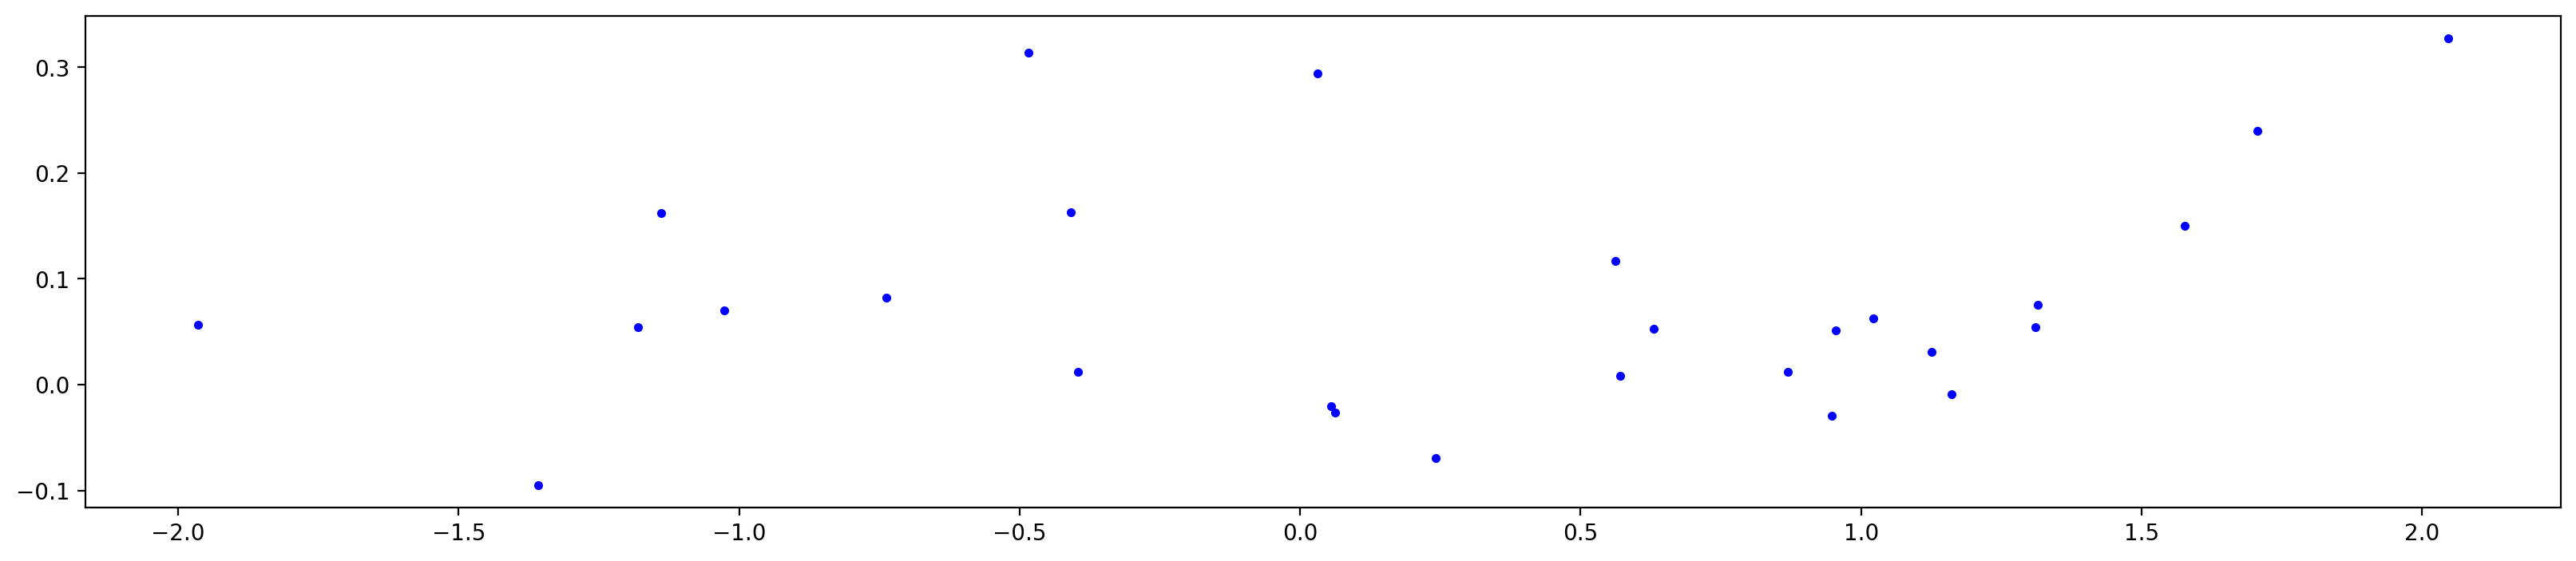

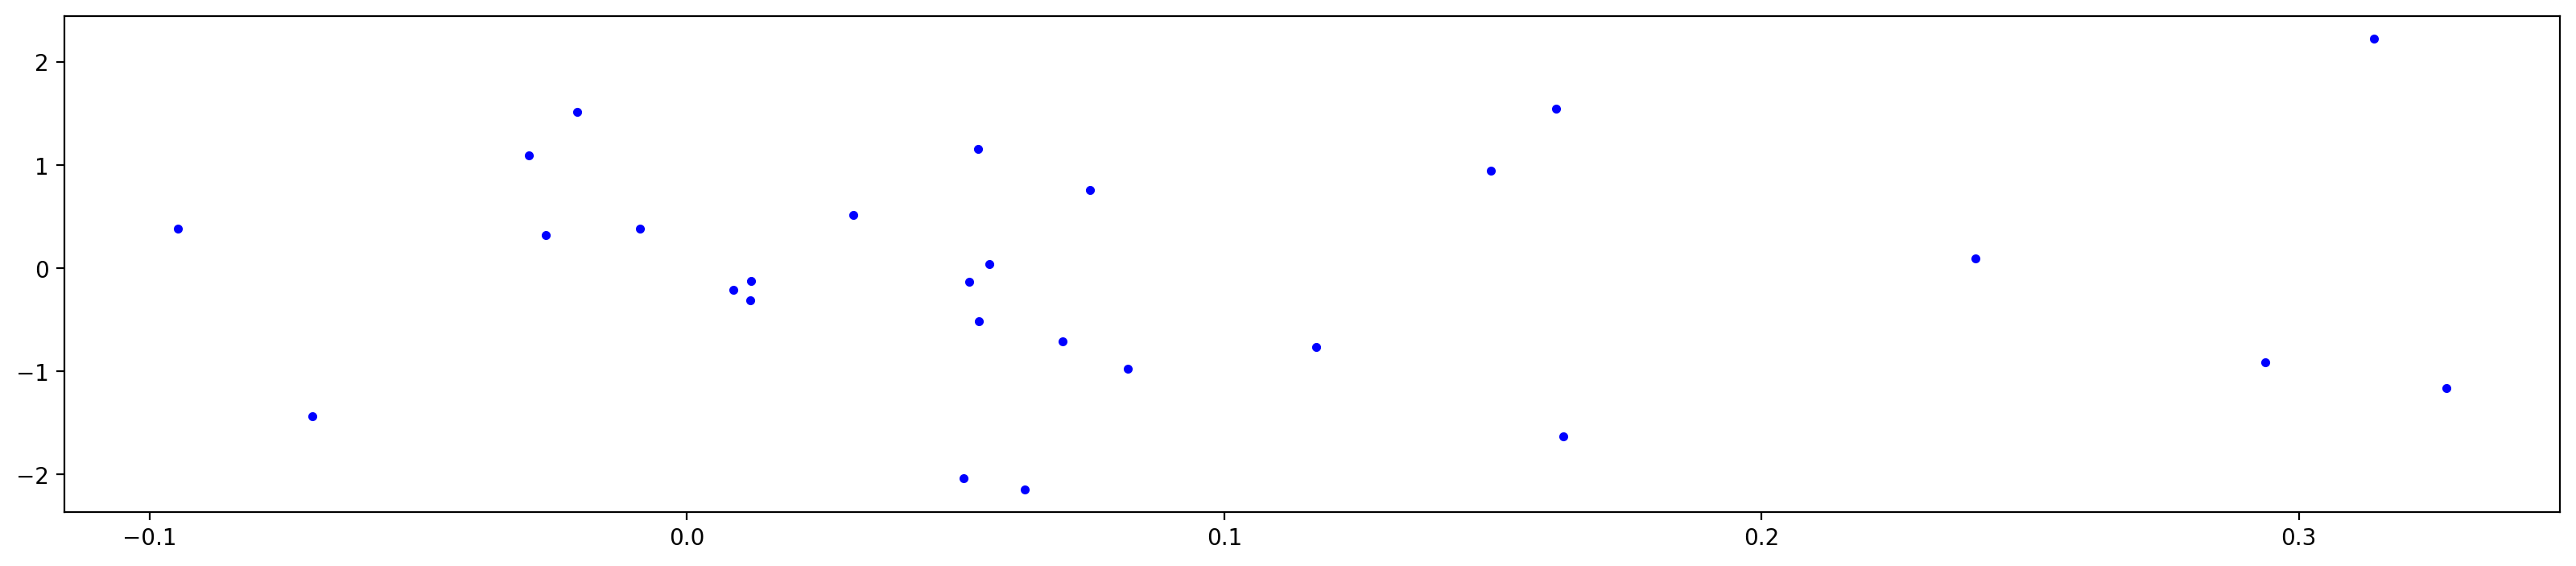

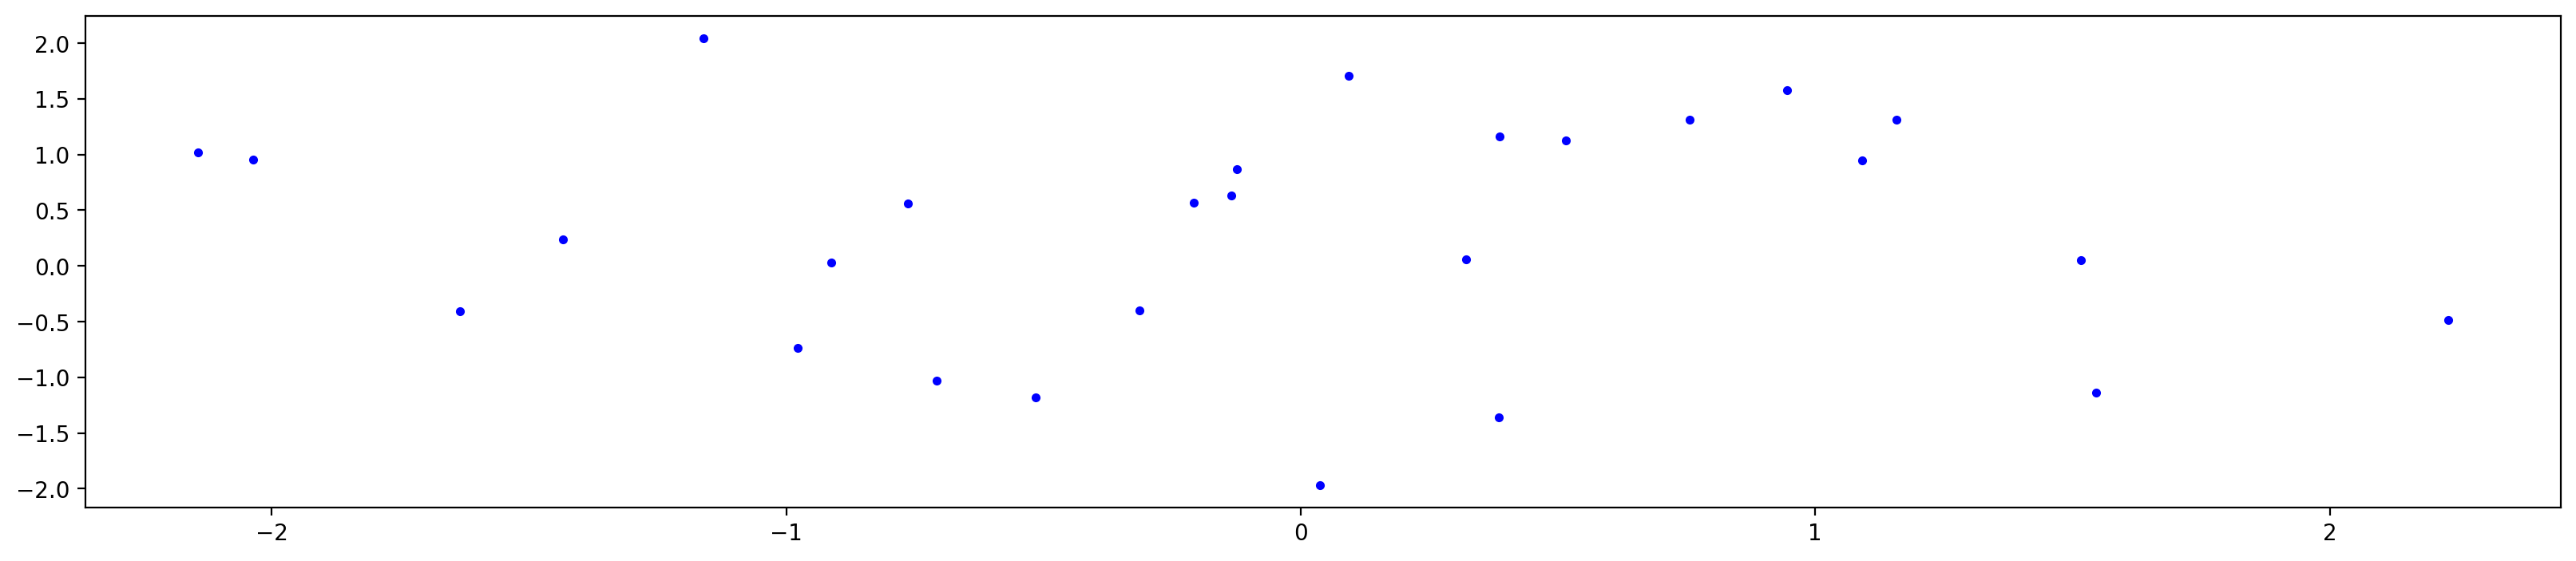

In [10]:
trainer.plotLatentSpace()

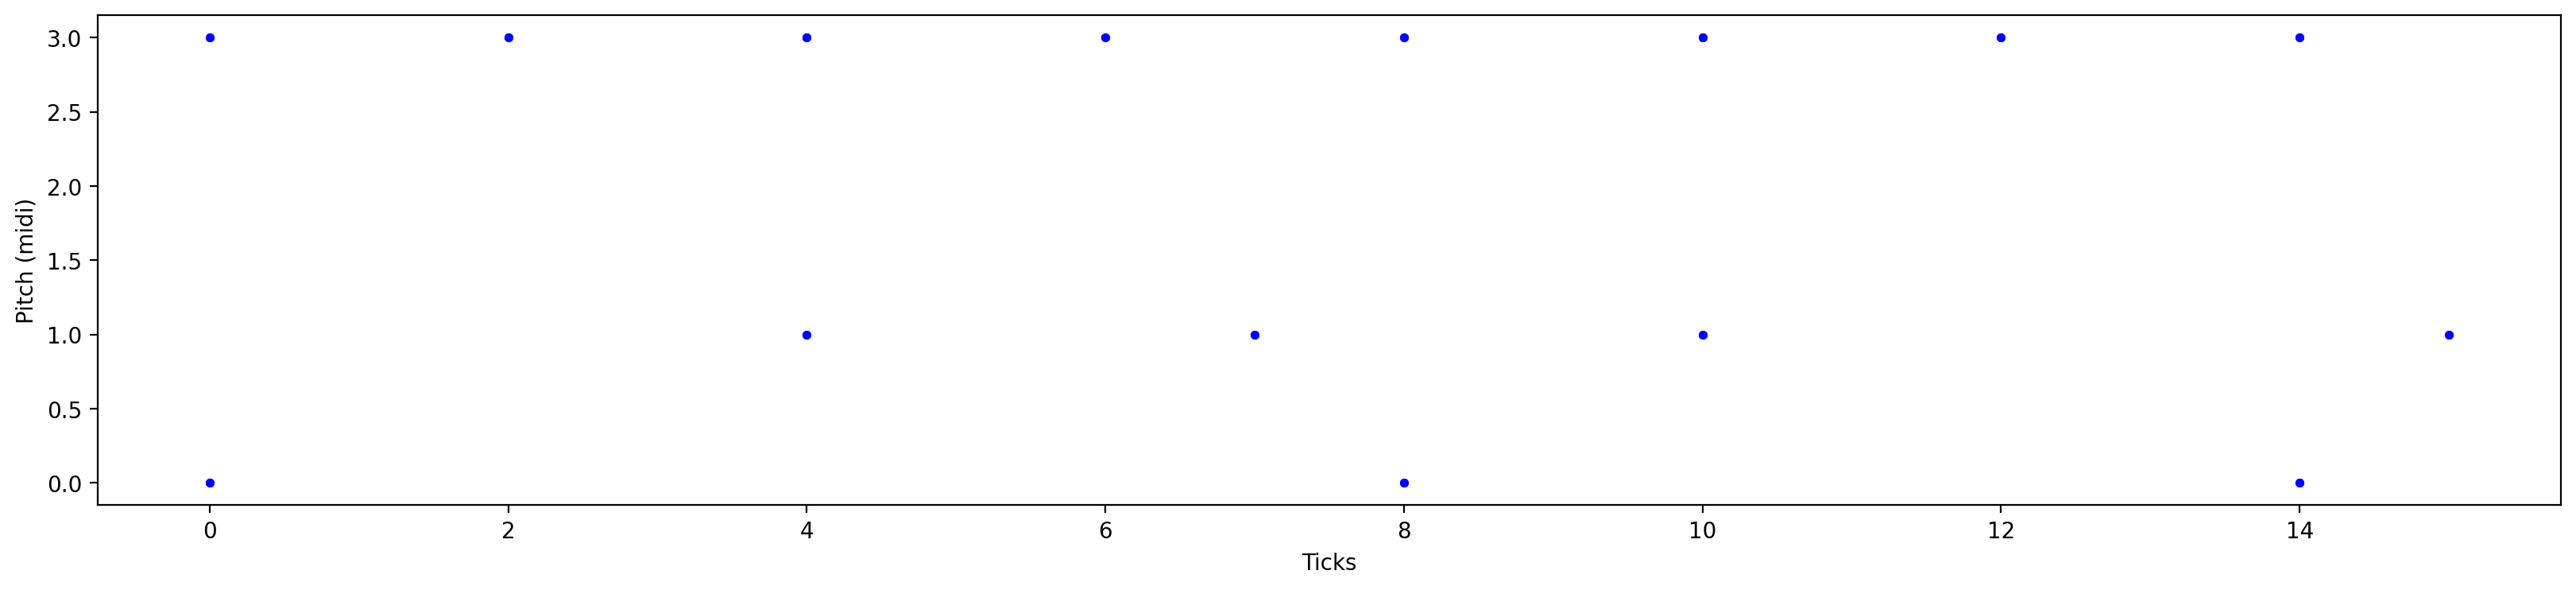

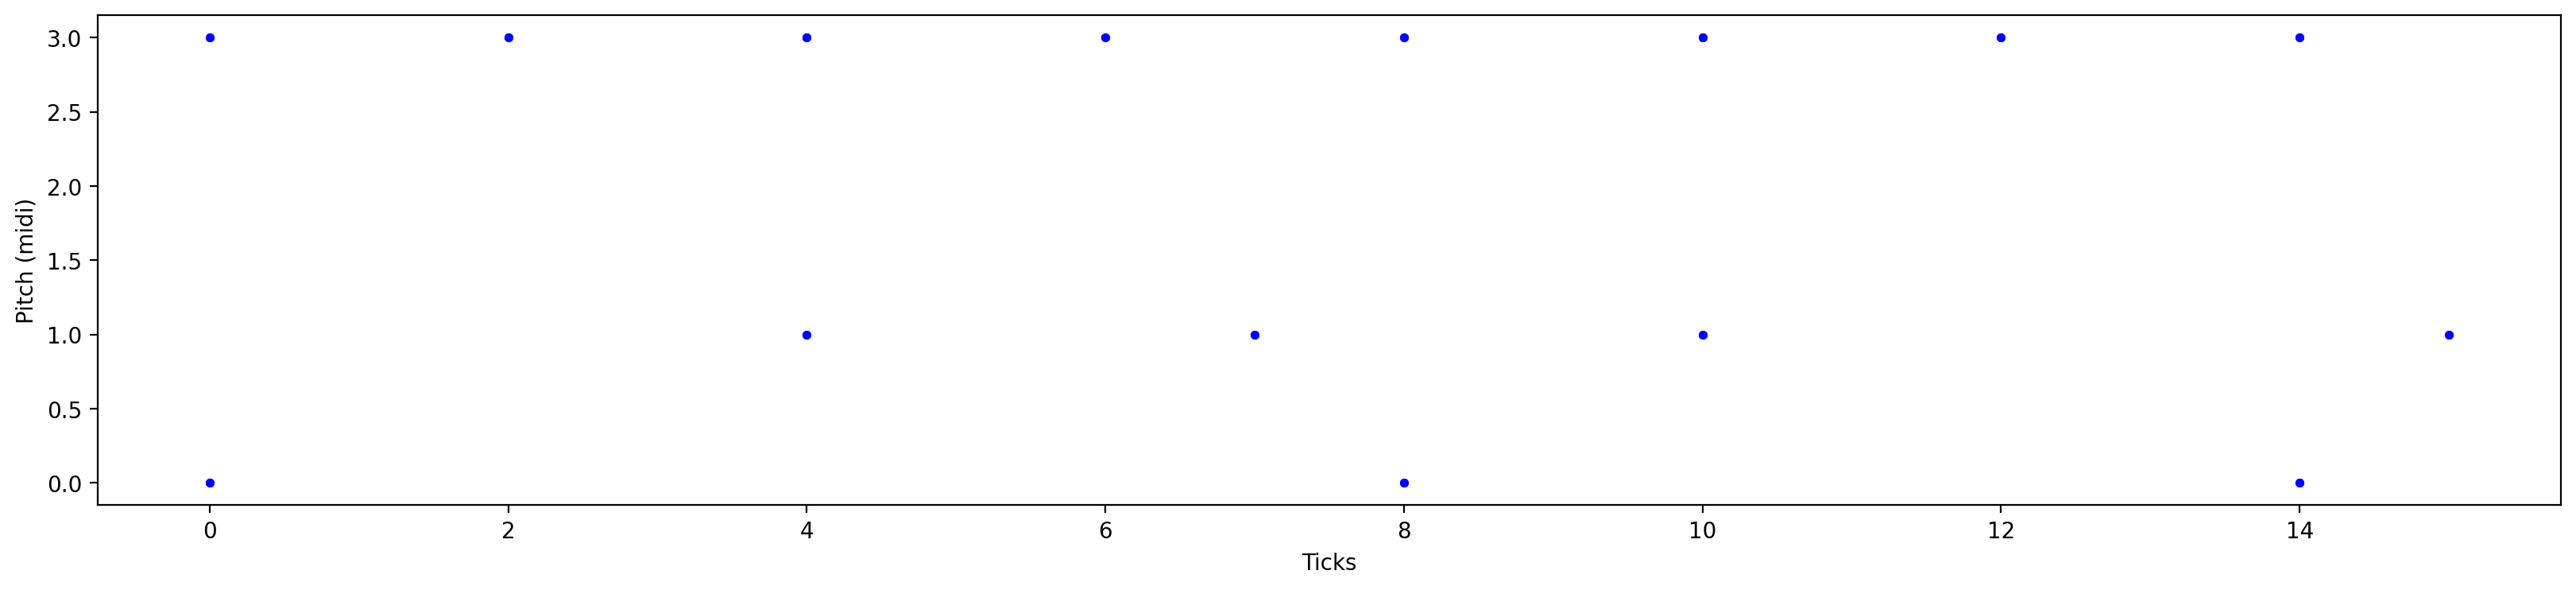

In [19]:
trainer.plotInputOutputSequence(0)

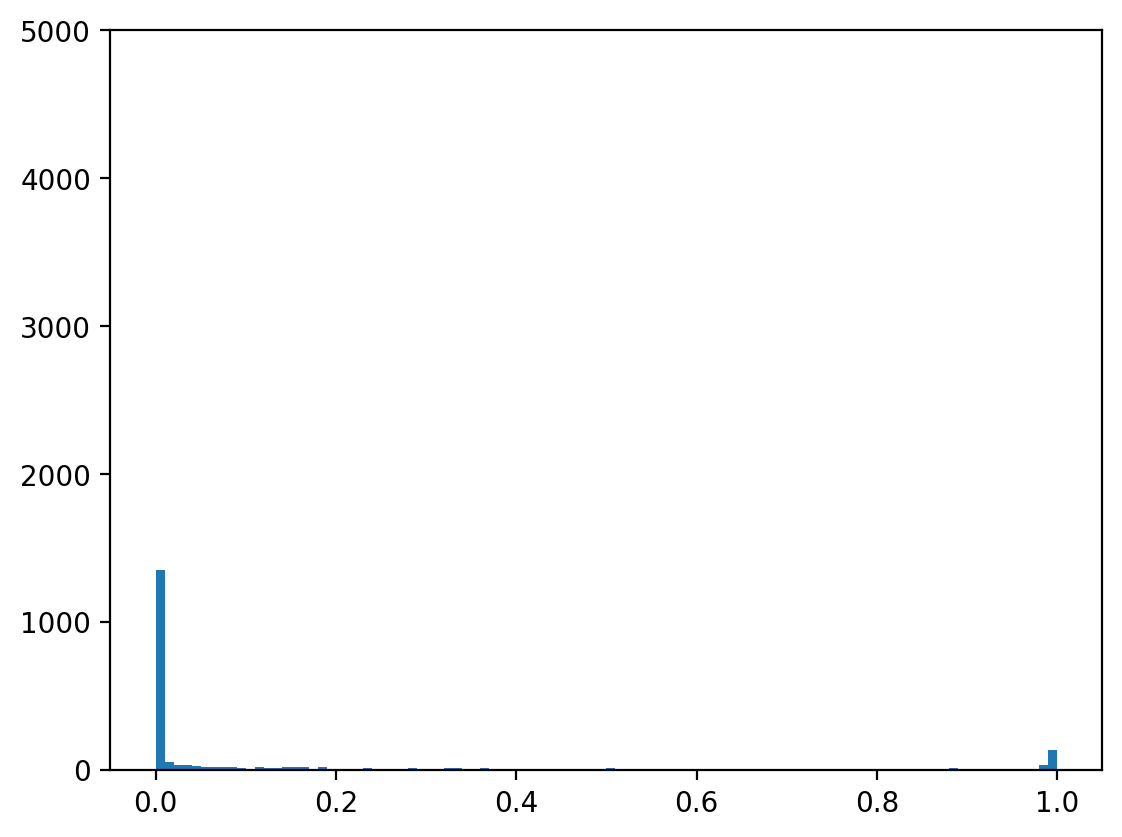

In [7]:
trainer.plotOutputValueDistribution()